In [6]:
from langgraph.graph import StateGraph, END, START  
from typing import TypedDict, List
from langchain_core.messages import HumanMessage, SystemMessage


In [ ]:
from openai import OpenAI
import os 

OPEN_AI_KEY = os.getenv("OPEN_AI_KEY")
client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="" + OPEN_AI_KEY,
)

def call_agent(message_content):
    completion = client.chat.completions.create(
    extra_headers={
        "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
        "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
    },
    extra_body={},
    model="x-ai/grok-code-fast-1",
    messages=[
        {
        "role": "user",
        "content": message_content
        }
    ]
    )
    return completion.choices[0].message.content

### Philosophical Perspectives
The meaning of life has puzzled thinkers for millennia, with no single definitive answer. From ancient Greek philosophers like Aristotle, who argued that eudaimonia (flourishing through virtue and reason) is the ultimate goal, to existentialists like Sartre, who claimed life is inherently meaningless but our freedom allows us to create our own purpose. Nihilists like Nietzsche suggested we embrace the void and will ourselves into meaning. In short, philosophy sees meaning as subjective: you define it through ethics, relationships, or personal growth.

### Religious and Spiritual Views
Many religions provide answers tied to divine purpose. Christianity teaches that life's meaning is to love God and others, aspiring to eternal life. In Buddhism and Hinduism, it's about escaping the cycle of suffering through enlightenment (nirvana or moksha). Islam emphasizes submission to God's will and good deeds for paradise. Spirituality often frames life as a journey t

In [31]:
from openai import OpenAI
import os
from typing import TypedDict, List
from langchain_core.messages import HumanMessage, SystemMessage

class AgentState(TypedDict):
    file_summaries : List[SystemMessage]
    file_count : int
    i : int = 0
    

graph = StateGraph(AgentState)

def summarize_the_current_file(state: AgentState):
    # getting files
    # summarize the particular file
    # add 1 to i
    pass


def should_continue(state: AgentState) -> AgentState:
    """Weather to continue the loop or not"""
    if state['i'] < state['file_count']:
        return "loop"
    else :
        return "exit"
    
def intialization(state: AgentState) -> AgentState:
    pass

def export_readme(state: AgentState): 
    pass



def initialization(state: AgentState):
    pass

graph = StateGraph(AgentState)

graph.add_node("Initialization", initialization)
graph.add_edge(START, "Initialization")
graph.add_node("summarize", summarize_the_current_file)
graph.add_edge("Initialization", "summarize")
graph.add_conditional_edges(
    "summarize", 
    should_continue, 
    {
        "loop" : "summarize", 
        "exit" : "Export_README"
    }
)
graph.add_node("Export_README", export_readme)
graph.add_edge("summarize", "Export_README")
graph.add_edge("Export_README", END)
app = graph.compile()


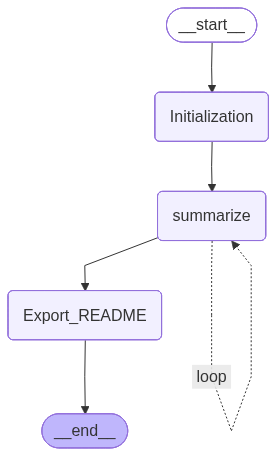

In [32]:
app